In [2]:
%matplotlib inline
import numpy as np
import pylab as pl
from classy import Class

In [3]:
from classy import Class

# Define your cosmology (what is not specified will be set to CLASS default parameters)
params = {
    'output': 'tCl pCl lCl',
    'l_max_scalars': 2000,
    'lensing': 'yes',
    'A_s': 2.3e-9,
    'n_s': 0.9624, 
    'h': 0.6711,
    'omega_b': 0.022068,
    'omega_cdm': 0.12029}

# Create an instance of the CLASS wrapper
cosmo = Class()

# Set the parameters to the cosmological code
cosmo.set(params)

# Run the whole code. Depending on your output, it will call the
# CLASS modules more or less fast. For instance, without any
# output asked, CLASS will only compute background quantities,
# thus running almost instantaneously.
# This is equivalent to the beginning of the `main` routine of CLASS,
# with all the struct_init() methods called.
cosmo.compute()

# Access the lensed cl until l=2000
cls = cosmo.lensed_cl(2000)

# Print on screen to see the output
print cls
# It is a dictionnary that contains the fields: tt, te, ee, bb, pp, tp

# plot something with matplotlib...

# Clean CLASS (the equivalent of the struct_free() in the `main`
# of CLASS. This step is primordial when running in a loop over different
# cosmologies, as you will saturate your memory very fast if you ommit
# it.
cosmo.struct_cleanup()

# If you want to change completely the cosmology, you should also
# clean the arguments, otherwise, if you are simply running on a loop
# of different values for the same parameters, this step is not needed
cosmo.empty()

{'pp': array([  0.00000000e+00,   0.00000000e+00,   9.59855233e-09, ...,
         5.30793102e-22,   5.29036706e-22,   5.27286711e-22]), 'ell': array([   0,    1,    2, ..., 1998, 1999, 2000]), 'bb': array([  0.00000000e+00,   0.00000000e+00,   2.71574126e-19, ...,
         1.00585903e-20,   1.00369386e-20,   1.00153492e-20]), 'ee': array([  0.00000000e+00,   0.00000000e+00,   7.90999980e-15, ...,
         1.88034961e-18,   1.86769054e-18,   1.85502334e-18]), 'tt': array([  0.00000000e+00,   0.00000000e+00,   1.61157384e-10, ...,
         4.89578624e-17,   4.89084328e-17,   4.88588893e-17]), 'tp': array([  0.00000000e+00,   0.00000000e+00,   5.20501127e-10, ...,
         1.72573628e-22,   1.72365841e-22,   1.72148094e-22]), 'te': array([  0.00000000e+00,   0.00000000e+00,   5.24381240e-13, ...,
        -3.78705478e-18,  -3.78169608e-18,  -3.77580522e-18])}


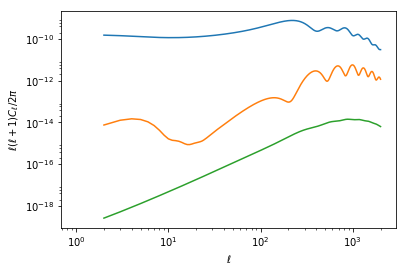

In [10]:
llp1 = cls['ell']*(cls['ell']+1.0) / (2*np.pi)
pl.loglog(cls['ell'], llp1*cls['tt'])
pl.loglog(cls['ell'], llp1*cls['ee'])
pl.loglog(cls['ell'], llp1*cls['bb'])
pl.xlabel(r'$\ell$')
pl.ylabel(r'$\ell (\ell+1) C_{\ell} / 2\pi$')